# Below is Code for Model Creation

(1331, 363)
False
AxesSubplot(0.0441435,0.0580556;0.938507x0.904722)
                                 Coefficient
White                              -0.515737
Black                              -0.124930
Hispanic                            0.140332
0-24                                0.912580
25-34                               0.348420
35-44                               0.102903
45-54                              -0.410467
55+                                 0.572531
Male                                1.033040
Female                              0.658484
Natural and Semisynthetic          -0.439892
Synthetic Opioids                  -0.180189
Methadone                          -0.333123
Heroin                             -0.388956
Less than a high school diploma     0.003709
High school diploma only           -0.001164
Some college (1-3 years)            0.011176
Four years of college or higher    -0.026568


C:\Users\dilli.DESKTOP-P60JFM2\AppData\Local\Temp\ipykernel_9388\608636149.py:96: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(seabornInstance.distplot(y[0:100]))


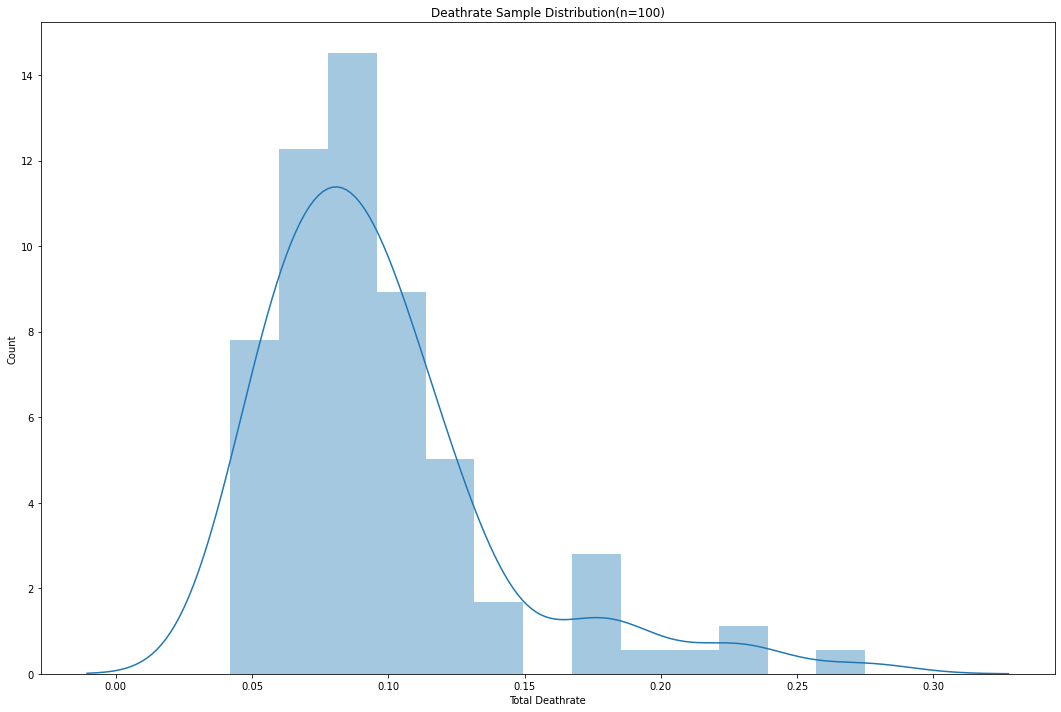

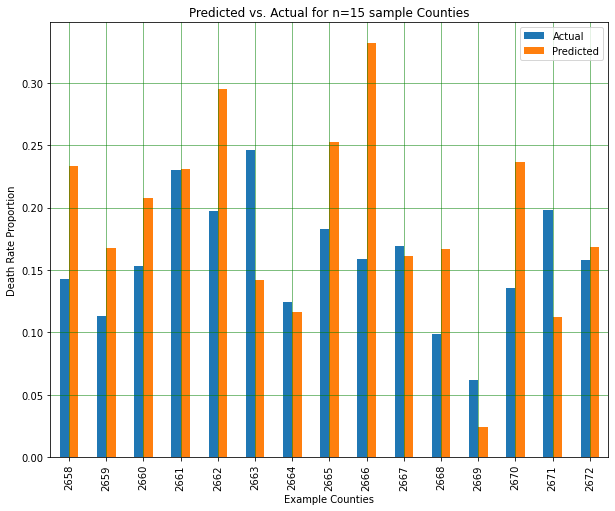

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 25 21:59:56 2020

@author: dilli
"""

import pickle
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm 

#kookoo= input("Enter File name:")

dataset = pd.read_csv('FINALnoyear.csv')

print( dataset.shape)

#if (dataset.isnull().any().any()):
#    dataset = dataset.fillna(method='ffill')

colsy = []
    
cols = list(dataset.columns)
for ele in cols: 
    if 'Total' in ele: 
        colsy.append(ele) 
        cols.remove(ele)
i=0
alltot= []
for i in range(len(colsy)): 
        alltot = np.append(alltot,dataset[colsy[i]].values, axis = 0)
        
i=0
k=0
while i < len(cols): 
    k+=1
    if i ==0:
        alldat = dataset[cols[2:20]].values
        alldat = np.append(alldat,dataset[cols[20:38]].values,axis=0)
        i+=38
    else:
        alldat = np.append(alldat,dataset[cols[i:i+18]].values,axis=0)
        i+=18

#l=[]
#for x in alltot:
#    i+=1
#    if np.isnan(x):
#        l.append(i)
i=0
for x in alltot:
    if np.isnan(x):
        alltot = np.delete(alltot,i,axis=0)
        alldat = np.delete(alldat,i, axis=0)
    else:
        i+=1

i=0
for x in alldat:
    if np.isnan(x).any():
        alltot = np.delete(alltot,i,axis=0)
        alldat = np.delete(alldat,i, axis=0)
    else:
        i+=1

q = np.isnan(alldat).any()
print(q)

alldat[:,14:18]*=.01





X = alldat
y = alltot
i=0
l=[]

plt.figure(figsize=(15,10))
plt.xlabel("Total Deathrate")
plt.ylabel("Count")
plt.title("Deathrate Sample Distribution(n=100)")
plt.tight_layout()
print(seabornInstance.distplot(y[0:100]))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regress = LinearRegression()  

mod = regress.fit(X_train, y_train)

coeff_df = pd.DataFrame(regress.coef_, cols[2:20], columns=['Coefficient'])  
print(coeff_df)

y_pred = regress.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.tail(15)


df1.plot(kind='bar',figsize=(10,8))
plt.xlabel("Example Counties")
plt.ylabel("Death Rate Proportion")
plt.title("Predicted vs. Actual for n=15 sample Counties")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

model = sm.OLS(y, X).fit()

#R = mod.score(alldat,y_pred)

model.summary()

#print("Score:",R)

filename = 'final_model_2024.sav'
pickle.dump(regress, open(filename, 'wb'))

# Below is the code for Testing Model

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 04:08:23 2020

@author: dilli
"""
import pickle
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import make_blobs

filename = 'C:/Users/dilli.DESKTOP-P60JFM2/Downloads/Data Science/Portfolio/AI Project/CSAI/final_model.sav'

model = pickle.load(open(filename, 'rb'))

#X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)


Xnew = [[2.8,3.5,3.5,2.2344,5.8653,11.172,6.9825,1.6758,4.3,1.4,2.75,0.73,0.78,1.96,0.0432,0.0929,0.1128,0.0745]]
ynew = model.predict(Xnew)

result = model.score(Xnew, ynew)
print("Predicted Death Rate:",ynew[0])


Predicted Death Rate: 0.13243298908315904


c:\Python310\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
